In [43]:
import torch

In [44]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

ModuleNotFoundError: No module named 'fastai.models'

In [ ]:
path = 'data/mnsit'

Below code will make directories, recursively in given path. If `exist_ok = True`, it will not raise exception error if tarket directory already exists

In [ ]:
import os
os.makedirs(path, exist_ok=True)

Now I have directory where I will store data, let's download the data from source URL

In [33]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz' # see this is .gz .pkl file --> pickle file, use pickle load to load

def load_mnsit(file):
    return pickle.load(gzip.open(file), encoding='latin-1')

Below is `fastai` function which will get file from URL and save in local repo

In [34]:
get_data(URL+FILENAME, path + FILENAME)
((x,y), (x_valid, y_valid), _) = load_mnsit(path + FILENAME)

NameError: name 'get_data' is not defined

#### Let's look at data. Understand dimensions, size of data

In [162]:
x_valid.shape # 28x28 pixel size and 10k images

(10000, 784)

In [163]:
x_img = x_valid.reshape(-1,28,28)
x_img.shape

(10000, 28, 28)

In [164]:
y_valid

array([3, 8, 6, ..., 5, 6, 8])

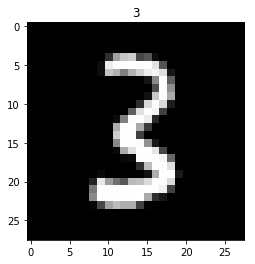

Text(0.5,1,'3')

In [45]:
plt.imshow(x_img[0], cmap='gray')
plt.show()
plt.title(y_valid[0])

Little bit experimentation with pixels of picture to practice tensor subset. Let's not take all picture, some pixel values. 

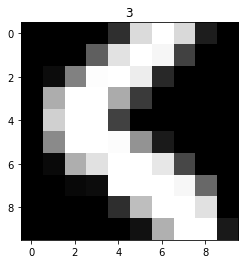

Text(0.5,1,'3')

In [47]:
plt.imshow(x_img[0,10:20,10:20], cmap='gray')
plt.show()
plt.title(y_valid[0])

In [66]:
def plots6(ims, figsize = (10,6), rows = 2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        s = f.add_subplot(rows, cols, i+1)
        if titles is not None: s.set_title(title[i])
        plt.imshow(ims[i], cmap = 'gray')
    plt.show()

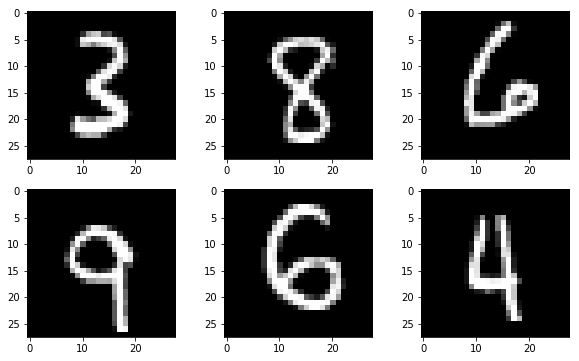

In [67]:
plots6(x_img[:6])

## Pytorch practice

In [10]:
import torch

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
loss_list = []

for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    loss_list.append((t, loss))

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

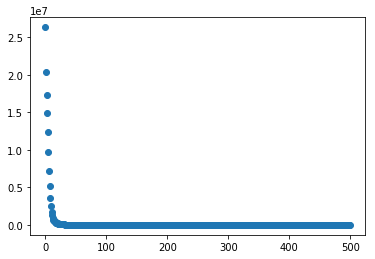

In [11]:
plt.scatter(x = [i[0] for i in loss_list], y = [i[1] for i in loss_list])
plt.show()

In [74]:
x.dot(w1).shape

(64, 100)

`mm` is matrix multiplication

In [6]:
a = torch.randn(2,3)
b = torch.randn(3,2)

a.mm(b)


 2.5893 -1.6666
-4.9597  2.8256
[torch.FloatTensor of size 2x2]

`clamp` does min or max operation on all elements of a tensor matrix

In [7]:
a


 1.2827  0.3575 -1.0719
-1.7055 -0.4994 -0.8551
[torch.FloatTensor of size 2x3]

In [98]:
a.clamp(min = 1)


 1.0000  1.0000  1.2978
 1.0000  1.0000  1.0000
 1.0000  1.0000  2.6871
[torch.FloatTensor of size 3x3]

`pow` takes power of all the elemnets of a tensor. `_` is doing inplace

In [110]:
a = torch.range(1,9)
a.resize_(3,3)

a.pow(3)

/Users/groverprince/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.3. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.



   1    8   27
  64  125  216
 343  512  729
[torch.FloatTensor of size 3x3]

In [21]:
((y_pred - y)*2).sum()

0.001463377382606268

In [20]:
((y_pred - y)*2).sum(0).sum(0)


1.00000e-03 *
  1.4634
[torch.FloatTensor of size 1]

In [120]:
a,a.t()

(
  1  2  3
  4  5  6
  7  8  9
 [torch.FloatTensor of size 3x3], 
  1  4  7
  2  5  8
  3  6  9
 [torch.FloatTensor of size 3x3])

### Using `Variable` for backpropagatio 

In [24]:
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs, and wrap them in Variables.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Variables during the backward pass.
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# Create random Tensors for weights, and wrap them in Variables.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Variables during the backward pass.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Variables; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Variables.
    # Now loss is a Variable of shape (1,) and loss.data is a Tensor of shape
    # (1,); loss.data[0] is a scalar value holding the loss.
    loss = (y_pred - y).pow(2).sum()
    #print(t, loss.data[0])

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w1.grad and w2.grad will be Variables holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Update weights using gradient descent; w1.data and w2.data are Tensors,
    # w1.grad and w2.grad are Variables and w1.grad.data and w2.grad.data are
    # Tensors.
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

In [124]:
a = torch.randn(3,3)
a


 0.4709 -1.2256  0.7913
-2.3437 -1.9122 -0.2198
 1.7673 -2.0683  0.0533
[torch.FloatTensor of size 3x3]

In [127]:
b = Variable(a)
b

Variable containing:
 0.4709 -1.2256  0.7913
-2.3437 -1.9122 -0.2198
 1.7673 -2.0683  0.0533
[torch.FloatTensor of size 3x3]

 ### Self auto grid

In [149]:
from torch.autograd import Variable


class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    def forward(self, input):
        """
        In the forward pass we receive a Tensor containing the input and return a
        Tensor containing the output. You can cache arbitrary Tensors for use in the
        backward pass using the save_for_backward method.
        """
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# Create random Tensors for weights, and wrap them in Variables.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Construct an instance of our MyReLU class to use in our network
    relu = MyReLU()

    # Forward pass: compute predicted y using operations on Variables; we compute
    # ReLU using our custom autograd operation.
    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    #print(t, loss.data[0])

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

### Now I have done a lot of practice on `pytorch`, I am going to implement neural net for logistic regression from scratch

In [150]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

First of all, `loss` in binary = `- (y*log(y_hat) + (1-y)*(log(1-y_hat)))`

In [154]:
net = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU(),
        nn.Linear(100,10),
        nn.LogSoftmax()
)

In [155]:
net

Sequential (
  (0): Linear (784 -> 100)
  (1): ReLU ()
  (2): Linear (100 -> 10)
  (3): LogSoftmax ()
)

In [158]:
! ls data

mnsit             mnsitmnist.pkl.gz


In [166]:
x.shape, x_valid.shape, y.shape, y_valid.shape

((50000, 784), (10000, 784), (50000,), (10000,))

In [167]:
md = ImageClassifierData.from_arrays(path, (x,y), (x_valid,y_valid) ) # give in form of tuple as written in docstring

In [171]:
loss = nn.NLLLoss()
metrics = [accuracy] # from fastai metrics.py
opt = optim.SGD(net.parameters(), lr = 1e-1, momentum=0.9) # will talk in detail about momentum later

In [183]:
def binary_loss(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [184]:
# toy example of loss
actuals = np.array([1,1,0,0])
preds = np.array([0.7,0.8, 0.1, 0.2])
binary_loss(actuals, preds)

0.22708064055624455

In [186]:
np.log(0.99), np.log(0.001)

(-0.010050335853501451, -6.9077552789821368)

There is `-ve` in formula because `log` is -ve for numbers b/w 0-1
Accuracy is 100% and loss is 0.22. Because we for 1 it was prediction 0.7, not 0.99. Therefore less confident. (maybe we could use loss to get CI for this method -- compare loss and accuracy)

In [191]:
fit(net, md, epochs= 2, opt=opt, metrics=metrics, crit= loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))


 28%|██▊       | 221/782 [00:02<00:07, 77.59it/s, loss=0.282]


 59%|█████▊    | 458/782 [00:04<00:03, 97.03it/s, loss=0.197]


 89%|████████▊ | 693/782 [00:06<00:00, 106.46it/s, loss=0.174]


100%|█████████▉| 779/782 [00:07<00:00, 109.08it/s, loss=0.165]
                                                              [ 0.       0.16491  0.13399  0.96089]

 18%|█▊        | 141/782 [00:01<00:08, 72.39it/s, loss=0.129]


 48%|████▊     | 372/782 [00:03<00:04, 98.97it/s, loss=0.119]


 76%|███████▋  | 597/782 [00:05<00:01, 107.20it/s, loss=0.114]


 99%|█████████▉| 775/782 [00:06<00:00, 111.85it/s, loss=0.128]
                                                              [ 1.       0.12843  0.10644  0.96766]



We can change the learning rate for our optimizer using `set_lrs` from fastai

In [256]:
set_lrs(opt, 1e-2)
fit(net, md, epochs= 2, opt=opt, metrics=metrics, crit= loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       0.04212  0.07826  0.97681]                          
[ 1.       0.03474  0.07826  0.97681]                          



By decreasing learning rate, it improved a bit

In [281]:
preds = predict(net, md.val_dl)

In [282]:
preds.shape # gave 10 predictions for all classes

(10000, 10)

In [283]:
np.argmax(preds, axis=1)[:10]

array([3, 8, 6, 9, 6, 9, 5, 3, 8, 4])

In [284]:
y_valid[:10]

array([3, 8, 6, 9, 6, 4, 5, 3, 8, 4])

In [286]:
# let's check validationa accuracy manually too (just for practice)

np.mean(y_valid == np.argmax(preds, axis=1))

# it is same as shown in widget above

0.97670000000000001

## Things from scratch

### 1. `net` part from scratch (logistic layers)

previously, we used `net` = nn.layers(l1,l2,l3) which are just combination of linear and non linear functions using matrix multiplications.

Like what I did for `gradient descent` above i.e. `Variable(torch object, require_grad = True)` to create a Variable, so that we can backtrack gradient from it, I will do same thing to save and backtrack weights. 

In order for `Variable` to be considered as nn module parameter, we can use very handy `nn_parameter` function

In [218]:
def get_weights(*dims):
    return nn.Parameter(torch.randn(dims)/dims[0])  # input is parameter tensor. # will start randomly

In [219]:
class logitreg(nn.Module):  # taking some functionalities of torch's nn module - Base class for all neural network modules
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28, 10) # random normal weights initialized (considering only 1 layer)
        self.l1_b = get_weights(10) # constants to add
    
    """
    We have 28*28 features, 10k input and 10 output. We want each
    """
    
    def forward(self, x): # will multiply weights to x
        y1 = x.mm(self.l1_w) + self.l1_b # linear layer
        y2 = torch.log(torch.exp(y1)/torch.exp(y1).sum(dim = 0) ) # non linear logsoftmax layer
        return y2 # output from logit    i.e. 10000x10 matrix        

Using all above steps again, just replacing `net` with out `logit`

In [240]:
net2 = logitreg()

In [243]:
# keeping opt same as previous
opt = optim.SGD(net2.parameters(), lr = 1e-1, momentum=0.9)

In [245]:
fit(net2, md, epochs=2, crit=loss, metrics = metrics, opt=opt )

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

[ 0.       2.49141  2.45471  0.89401]                        
[ 1.       2.498    2.44274  0.89829]                        



Ok. Accuracy looks OKaish but what happended to loss? 

In [287]:
xm, ym = next(iter(md.trn_dl)) # because it was minibatch with bs = 64

In [291]:
xmv = Variable(xm)
xmv

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatTensor of size 64x784]

In [295]:
preds2 = net2(xmv).exp()
preds2.max(1)[1]


Variable containing:
 7
 1
 7
 3
 6
 7
 2
 6
 6
 4
 9
 9
 0
 7
 5
 2
 1
 1
 9
 7
 4
 1
 4
 4
 1
 1
 2
 9
 9
 7
 1
 8
 2
 1
 0
 4
 3
 4
 1
 3
 9
 3
 9
 4
 1
 0
 0
 8
 0
 1
 2
 6
 4
 4
 3
 5
 7
 0
 4
 3
 9
 8
 7
 6
[torch.LongTensor of size 64]

In [299]:
preds = predict(net2, md.val_dl).argmax(1)
np.mean(preds == y_valid)

0.8962

In [305]:
preds_train = predict(net2, md.trn_dl).argmax(1)
np.mean(preds_train == y)

0.10016

Why is it performing bad in training set?? Not possible

### 2. `Fit` from scratch

We fed `model, data, optimizer, loss criteria` into `fit` method. Need to take care of those.

What is `fit` doing? -> It is doing forward pass (not actually), backward propagation, seeing gradient wrt weights and updating weights as to lower loss. So trainign is basically training of weights given our xs and ys. Let's try to replicate this ourselves. 

Basically, it's same as doing gradient descent in a loop (there used range(500)), so that it minimized loss funciton

For this, we need to use and understand `iterator`. For iterator, think like a function with a for loop, but rather than running all the loops at once and returning object, it returns objects after each iteration and stops. For next object we will have to use `next`, then it will go to next iteration of loop.

`Iterator` of what? Now we will be using stochastic gradient descent. So input will have `bs` images at 1st iteration, do prediction, calculate gradient, change weights, THEN go to 2nd, 3rd etc... Here our data was in `ImageLoader`. So let's try to iterate data first. 

Btw, before we continue, gradients will be saved by putting weight tensors in `Variables` (because we take d(loss)/d(wi). Something to keep in mind

In [501]:
# initializing logit model (has random weights initially)

net3 = logitreg() 
optimizer = optim.SGD(net3.parameters(), lr = 1e-3)

In [502]:
# let try iterator for Imagedata which was md. We can not iter(md), need it's input/output as iterable. 
# what do you mean by having model as iterable. nothing

it = iter(md.trn_dl)

In [440]:
xit, yit = next(it)

In [441]:
xit.size()

torch.Size([64, 784])

In [442]:
# lets predict for this small batch and compare. net3 is forward pass

y_pred_it = net3(Variable(xit))
y_pred_data = y_pred_it.data.numpy()

yit_data = Variable(yit)
yit_data_np = yit_data.data.numpy()

**to_np** in Jeremy's nb is just function to convert `Variable` to `np`. I will use my own.

To get np of Variable, we can just use Variable.data

In [443]:
# lets see accuracy on this random initialized net3

np.mean(yit_data_np == y_pred_data.argmax(1))

0.09375

In [444]:
yit_data_np, y_pred_data.argmax(1)

(array([3, 3, 3, 4, 5, 0, 2, 5, 6, 2, 0, 4, 4, 7, 3, 2, 3, 6, 7, 4, 9, 8, 6, 7, 4, 7, 6, 1, 7, 1, 0, 3, 5, 2,
        7, 6, 2, 4, 1, 6, 4, 2, 6, 1, 4, 0, 7, 7, 7, 3, 7, 6, 6, 9, 7, 2, 1, 5, 5, 6, 7, 9, 1, 4]),
 array([1, 1, 1, 1, 9, 2, 0, 7, 0, 2, 4, 7, 5, 8, 2, 9, 9, 5, 5, 4, 0, 1, 9, 1, 7, 0, 9, 7, 7, 1, 4, 1, 9, 4,
        2, 0, 6, 2, 2, 8, 9, 0, 0, 7, 4, 3, 5, 2, 8, 8, 2, 7, 5, 0, 5, 0, 2, 7, 9, 7, 8, 9, 2, 7]))

In [445]:
# what is loss?

l = loss(y_pred_it, yit_data);l

Variable containing:
 4.1595
[torch.FloatTensor of size 1]

Now above are accuracy and loss of data in first minibatch. Loss is high, accuracy is low. Should be because initial weights were random and we haven't even started gradient descent yet.

Let's try this changing weights in a  loop. Theoritically, one should set `gradients` (gradient of weights) to 0 after each minibatch because it gradient for each minibatch are independent of each other. Let's try without it and how it affects

In [448]:
# gradient of calculated loss above. 
l.backward()

# optimizer with move one more step based on our gradient. 
optimizer.step()

**Second step** of predictions now

In [449]:
xit2, yit2 = next(it)
y_pred = net3(Variable(xit2))

In [451]:
l2 = loss(y_pred, Variable(yit2));l2

Variable containing:
 4.1594
[torch.FloatTensor of size 1]

In [463]:
y_pred.data.numpy().argmax(1), Variable(yit2).data.numpy()

(array([2, 7, 3, 4, 4, 7, 9, 7, 9, 7, 0, 3, 5, 0, 2, 0, 4, 1, 8, 2, 6, 3, 3, 5, 2, 5, 1, 7, 0, 6, 9, 4, 8, 1,
        4, 9, 5, 2, 1, 0, 3, 5, 5, 0, 1, 2, 2, 5, 5, 5, 0, 2, 2, 9, 9, 9, 5, 5, 0, 1, 3, 8, 8, 2]),
 array([9, 1, 8, 1, 2, 7, 6, 1, 8, 4, 2, 5, 4, 4, 9, 6, 6, 6, 5, 8, 8, 8, 8, 4, 7, 1, 3, 9, 0, 3, 9, 0, 5, 7,
        1, 8, 7, 4, 3, 0, 8, 4, 7, 6, 2, 1, 7, 7, 3, 7, 2, 1, 8, 4, 8, 8, 1, 5, 6, 8, 0, 8, 5, 2]))

In [464]:
# accuracy

np.mean(Variable(yit2).data.numpy() == y_pred.data.numpy().argmax(1))

0.109375

Accuracy went up a little. Loss will not change much and keep in mind it is stochastic gradient descent. Loss can increase too when moving from 1 minibatch to other

**Third step** of predictions now

In [470]:
# gradient of calculated loss above. 
l2.backward()

# optimizer with move one more step based on our gradient. 
optimizer.step()

In [471]:
xit3, yit3 = next(it)
y_pred = net3(Variable(xit3))

In [472]:
l3 = loss(y_pred, Variable(yit3));l3

Variable containing:
 4.1559
[torch.FloatTensor of size 1]

In [473]:
y_pred.data.numpy().argmax(1), Variable(yit3).data.numpy()

(array([2, 7, 6, 8, 1, 0, 0, 7, 0, 9, 0, 4, 5, 7, 9, 0, 6, 0, 2, 2, 0, 8, 9, 0, 6, 1, 2, 9, 2, 7, 8, 6, 8, 4,
        9, 4, 6, 7, 9, 5, 7, 1, 2, 2, 9, 4, 2, 6, 7, 7, 4, 5, 7, 1, 8, 1, 7, 1, 0, 8, 2, 8, 5, 9]),
 array([8, 4, 8, 9, 3, 0, 6, 1, 6, 0, 0, 0, 6, 6, 7, 5, 2, 4, 9, 9, 9, 8, 3, 6, 2, 3, 8, 8, 8, 9, 3, 2, 6, 6,
        8, 0, 4, 1, 8, 8, 9, 1, 9, 9, 3, 8, 2, 2, 1, 6, 4, 4, 5, 1, 9, 3, 1, 3, 2, 7, 8, 7, 8, 8]))

In [474]:
# accuracy

np.mean(Variable(yit3).data.numpy() == y_pred.data.numpy().argmax(1))

0.109375

In [475]:
optimizer.param_groups

[{'dampening': 0,
  'lr': 0.001,
  'momentum': 0,
  'nesterov': False,
  'params': [Parameter containing:
    1.1370e-03 -5.3062e-04 -4.8454e-04  ...  -2.6071e-04  1.7006e-03  6.2953e-04
    2.6783e-03  6.2643e-04  1.4280e-03  ...   3.1493e-04  7.1249e-04 -9.8977e-04
   -3.0561e-03 -1.1602e-03  3.9273e-04  ...   9.8646e-05  1.3782e-05  1.6302e-03
                   ...                   ⋱                   ...                
    1.3710e-03 -6.6718e-05  5.8136e-04  ...  -3.1057e-04 -7.8875e-04  7.1566e-04
   -6.0872e-04  1.6282e-04 -2.2107e-03  ...  -7.0135e-04 -1.0192e-03 -1.8679e-03
    1.7978e-03  1.7530e-03 -4.0816e-05  ...   8.0427e-04  2.2990e-04 -6.8521e-04
   [torch.FloatTensor of size 784x10], Parameter containing:
   -0.0989
   -0.0604
    0.1079
    0.0808
   -0.0405
    0.1836
    0.1635
   -0.0095
   -0.0195
   -0.1505
   [torch.FloatTensor of size 10]],
  'weight_decay': 0}]

Lets run same thing in a loop

In [503]:
for i in range(100):
    xit, yit = next(it)
    y_pred = net3(Variable(xit))
    
    #loss
    l = loss(y_pred, Variable(yit))
    
    # accuracy
    acc = np.mean(Variable(yit).data.numpy() == y_pred.data.numpy().argmax(1))
    
    if i%10 == 0:
        print("loss = ", l.data[0], "\t accuracy = ", acc)
    
    optimizer.zero_grad() # need to re-initialize gradient before calling l.backward()
    l.backward() # this will calculate grad and store them in w.grad()
    optimizer.step()

loss =  4.159508228302002 	 accuracy =  0.0625
loss =  4.148634910583496 	 accuracy =  0.34375
loss =  4.137960910797119 	 accuracy =  0.671875
loss =  4.125006198883057 	 accuracy =  0.78125
loss =  4.114231586456299 	 accuracy =  0.75
loss =  4.106197834014893 	 accuracy =  0.734375
loss =  4.091577529907227 	 accuracy =  0.796875
loss =  4.086956977844238 	 accuracy =  0.703125
loss =  4.0747246742248535 	 accuracy =  0.75
loss =  4.050030708312988 	 accuracy =  0.78125


So, till above step, I tried without using `optimizer.zero_grad` and it gave pathetic results. Accuracy not improving, loss not decreasing after many iterations. Reason for this is that - **gradients in backprapagation when we used loss.backpro() were calculated using chain rule. means gradients were accumulated after each function and multiplies to give final gradient of loss wrt weigths**. Now after each minibatch completion, we restart this process, only update weights and gradient should start from 0. 

Now I edited and used .zero_grad and as we see accuracy is improving. 

Putting above loop code in training loop to **spit out final validation score** and ** to run for n epochs**

In [507]:
it = iter(md.trn_dl)
len(it)

782

In [545]:
#defining score to use in validation score test

def score(xit, yit):  # we will give direct outout of next in this, i.e. similar to xit, yit
    y_pred = net.forward(Variable(xit))
    y_pred_np = y_pred.data.numpy()
    return np.mean(yit.numpy() == y_pred_np.argmax(1))

In [549]:
net = logitreg()
loss = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-3)
epochs = 3

for i in range(epochs):
    losses = []
    it = iter(md.trn_dl)
    
    for j in range(len(it)):
    
        xit, yit = next(it)
        y_pred = net.forward(Variable(xit))

        #loss
        l = loss(y_pred, Variable(yit))
        losses.append(l)

        # accuracy
        #acc = np.mean(Variable(yit).data.numpy() == y_pred.data.numpy().argmax(1))

        #if i%10 == 0:
         #   print("loss = ", l.data[0], "\t accuracy = ", acc)

        optimizer.zero_grad() # need to re-initialize gradient before calling l.backward()
        l.backward() # this will calculate grad and store them in w.grad()
        optimizer.step() # this will update parameters(weights based on gradient descend)
    
    # calculating validation score after completing 1 epoch
    val = iter(md.val_dl)
    val_scores = [score(*next(val)) for k in range(len(val)) ] # *next will iterate through all nexts
    print("final validation score ", np.mean(val_scores)) 
    

final validation score  0.808618630573
final validation score  0.833001592357
final validation score  0.845242834395


### 3. `Optimizer`  and `backward` from scratch

Now, there are 2 things that we used from pytorch. 

1. **Optimizer** - which updated weights based on SGD . 
2. **loss.backward()** - which used chain rule to calculate derivates of loss wrt weights . 

Let's  make our own functions for those

Formula for updatig weights =

`weight_new = weight_previous - learning_rate * gradient_loss_wrt_weight`

Copying baseline code from 1 step above and changing wherever required

In [550]:
net = logitreg()
loss = nn.NLLLoss()
# optimizer = optim.SGD(net.parameters(), lr = 1e-3)  -- this sir we don't have now
epochs = 3
lr = 1e-2

w, b = net.l1_w, net.l1_b # according to our logreg function, we have them here

for i in range(epochs):
    losses = []
    it = iter(md.trn_dl)
    
    for j in range(len(it)):
    
        xit, yit = next(it)
        y_pred = net.forward(Variable(xit))

        #loss
        l = loss(y_pred, Variable(yit))
        losses.append(l)

        # optimizer.zero_grad() # how to make grad 0 yourself?
        
        """
        so, we know l.backward had saved gradients in w.grads. Just pull those and make em 0
        but with an if condition as for first iteration, it won't find w.grads at all as
        we don't have l.backward() run yet
        """
        if w.grad is not None:
            w.grad.data.zero_() # _ is for inplace
            b.grad.data.zero_()
   
    
        l.backward() # this will calculate grad and store them in w.grad()
        
        # optimizer.step() # this will update parameters(weights based on gradient descend)
        
        """
        now we need to update weights in parameters of net i.e. net.l1_w and net.l1_b
        """
        
        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        
    
    # calculating validation score after completing 1 epoch
    val = iter(md.val_dl)
    val_scores = [score(*next(val)) for k in range(len(val)) ] # *next will iterate through all nexts
    print("final validation score ", np.mean(val_scores)) 
    

final validation score  0.869625796178
final validation score  0.884355095541
final validation score  0.890923566879


Didn't do `backward` from scratch yet. later. sleepy!